##📋 Índice del Proyecto: Análisis de Ventas y Marketing

**Datasets:** `ventas.csv`, `clientes.csv`, `marketing.csv` (en Drive).

###1. Introducción y Configuración
- Objetivos del Análisis.

- Importación de Librerías y Carga de Datasets (ventas, clientes, marketing).

###2. ETAPA 1 y 2: Calidad e Ingeniería de Datos
Limpieza y Normalización:

- Aplicación de funciones personalizadas (limpiar_precio, limpiar_cantidad).

- Normalización de fechas y textos.

- Transformación (Feature Engineering):

- Creación del KPI principal: ingreso_total (Precio × Cantidad).

Agregación y Segmentación:

- Generación de reportes agrupados: resumen_cat (Categorías) y resumen_prod (Productos).

- Filtro de Alto Rendimiento: Segmentación del Top 20% (Pareto).

📊 Visualización Integrada:

- Gráfico de Barras: Ranking de Ingresos por Categoría y Producto.

###3. ETAPA 3: Análisis Estadístico y Exploratorio (EDA)
Estadística Descriptiva:

- Cálculo de medidas de tendencia central (Media, Mediana) y dispersión.

- Detección de Anomalías (Outliers):

- Cálculo del Rango Intercuartílico (IQR) por Producto.

📊 Visualización Integrada: Boxplot (Caja y Bigotes) para validación de outliers.

Análisis de Relaciones y Tendencias:

- Cálculo de Correlación de Pearson (Precio vs. Unidades).

📊 Visualización Integrada: Scatter Plot (Dispersión) de Precio vs. Demanda.

###4. Conclusiones Integrales
Síntesis del Rendimiento Comercial.

Hallazgos Estadísticos y Recomendaciones de Negocio.

### Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Funciones

In [ ]:
def eda(df, nombre):
    """
    Realiza un análisis exploratorio básico de un DataFrame.
    Muestra: shape, columnas, dtypes, nulos, describe numérico y head.
    """
    print(f"=== EDA:{nombre} ===")
    print("dimensiones (Shape):", df.shape)
    print("columnas:", list(df.columns))
    print("tipos de Datos (dtypes):")
    print(df.dtypes)
    print("\nNulos por columna:")
    print(df.isna().sum())
    print("\nPrimeras filas:")
    display(df.head())
    print("\nDescribe (numérico):")
    display(df.describe(include='number'))
    print("-"*100)

In [ ]:
def calidad(df, nombre, clave=None):
    """
    Reporta nulos por columna, duplicados exactos y duplicados por clave.
    """
    # Título descriptivo con el nombre del DF
    print(f"### {nombre}")
    # Cantidad de valores nulos por columna
    display(df.isna().sum().to_frame("nulos"))

    # Contar filas duplicadas completas
    dup_rows = df.duplicated(keep=False).sum()
    print("Filas duplicadas (exactas):", dup_rows)

    # Analizar duplicados por clave si se proporciona
    if clave and clave in df.columns:
        dup_key = df[clave].duplicated(keep=False).sum() # Solo contamos las ocurrencias extras
        print(f"Duplicados por clave '{clave}':", dup_key)
        if dup_key > 0:
            duplicados_ordenados = (
                df[df[clave].duplicated(keep=False)][clave]
                .value_counts()
                .sort_values(ascending=False)
            )

            print("\n🔁 Top valores duplicados más frecuentes:")
            display(duplicados_ordenados.head(10))
        else:
            print(f"No se encontraron duplicados en la clave '{clave}'.")
    else:
        if clave:
            print(f"La clave '{clave}' no existe en el DataFrame.")
        else:
            print("No se indicó una clave para analizar duplicados por columna.")

In [ ]:
def normalizar_texto(df):
    """
    Limpia espacios extra, caracteres invisibles y estandariza a formato Título
    en todas las columnas de tipo 'object'.
    """
    for col in df.select_dtypes(include="object").columns:
        df_transformado=df[col].astype(str) # Convierte cualquier tipo a string
        df_transformado=df_transformado.str.strip() #borra espacios en blanco por defecto.
        df_transformado=df_transformado.str.replace(r"[\u200b\t\r\n]", "", regex=True)  #patron: expresión regular que busca caracteres invisibles (\u200b, tabulaciones, saltos)
                                                                                         # reemplazo: ""  → los elimina
        df_transformado=df_transformado.str.replace(" +", " ", regex=True) # reemplaza "uno o más espacios consecutivos" por un solo espacio
        df_transformado=df_transformado.str.title() # Convierte a Título
        df[col]=df_transformado
    return df

In [ ]:
def normalizar_fechas(df, keyword="fecha"):
    """
    Busca columnas que contengan una palabra clave (por defecto 'fecha')
    y las convierte a datetime.
    """
    # Iteramos sobre las columnas del dataframe
    for col in df.columns:
        if keyword in col.lower():
            # Convertimos a datetime con la configuración para formato latino
            df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)
            print(f"Columna '{col}' convertida a datetime.")

    return df

In [ ]:
def limpiar_numeros(df, col_name, simbolos_a_quitar=["$", ","]):
    """
    Limpia una columna convirtiéndola a numérico.
    1. Elimina símbolos especificados (como $ o ,).
    2. Quita espacios.
    3. Convierte a float/int (NaN si falla).
    """
    if col_name in df.columns:
        # Convertimos a string para poder usar métodos de texto (.str)
        serie_limpia = df[col_name].astype(str)

        # Iteramos sobre la lista de símbolos para quitarlos uno por uno
        for simbolo in simbolos_a_quitar:
            serie_limpia = serie_limpia.str.replace(simbolo, "", regex=False)

        # Quitamos espacios y convertimos a numérico
        df[col_name] = pd.to_numeric(serie_limpia.str.strip(), errors="coerce")
        print(f"Columna '{col_name}' normalizada a numérico.")

    else:
        print(f"La columna '{col_name}' no existe en el DataFrame.")

    return df

In [ ]:
def limpiar_cantidad(df, col_name):
    """
    1. Convierte a numérico.
    2. Transforma a tipo 'Int64' (Entero que acepta NaN).
    """
    if col_name in df.columns:
        # Primero convertimos a número estándar
        df[col_name] = pd.to_numeric(df[col_name], errors="coerce")

        # Luego forzamos el tipo entero que soporta nulos
        df[col_name] = df[col_name].astype("Int64")
        print(f"Columna '{col_name}' convertida a Int64.")
    return df

In [ ]:
def reporte_calidad_global(dfs, nombres):
    """Crea un resumen de calidad
    (filas, cols, nulos, duplicados) de varios DataFrames.
    """
    resumen = []
    for df, nombre in zip(dfs, nombres):
        nulos = df.isna().sum().sum()
        duplicados = df.duplicated(keep=False).sum()  # Duplicados extra
        columnas = len(df.columns)
        filas = len(df)
        resumen.append({
            "Dataset": nombre,
            "Filas": filas,
            "Columnas": columnas,
            "Nulos totales": nulos,
            "Duplicados": duplicados, # Muestra duplicados extras
        })
    return pd.DataFrame(resumen).set_index("Dataset")

In [ ]:
def encontrar_columna(df, candidatos):
    """Busca la primera columna cuyo nombre contenga
    (case-insensitive) alguno de los patrones dados.
    """
    for c in df.columns:
        nombre = c.lower()
        # Verificamos si alguna palabra (patrón) de la lista 'candidatos' está contenida dentro del nombre de la columna
        if any(p in nombre for p in candidatos):
            return c  # Devuelve el nombre original
    return None

In [ ]:
def filtrar_top_rendimiento(df, col_metrica="ingreso_total", col_desempate="unidades_vendidas", q=0.80, mostrar_info=True):
    """
    Filtra el segmento superior del DataFrame basado en un percentil (q).

    Args:
        df: DataFrame agrupado por producto.
        col_metrica: Columna principal para definir el rendimiento (ej. 'ingreso_total').
        col_desempate: Columna secundaria para ordenar si hay empate.
        q: Percentil de corte (0.80 significa el Top 20%).
        mostrar_info: Si es True, imprime un resumen del filtro aplicado.

    Returns:
        DataFrame filtrado y ordenado.
    """
    # 1. Calcular el umbral de corte (el valor numérico del percentil)
    umbral = df[col_metrica].quantile(q=q, interpolation="linear")

    # 2. Filtrar los datos
    df_filtrado = df.query(f"{col_metrica} >= @umbral", engine="python" ).copy()

    # 3. Configurar el ordenamiento (De mayor a menor)
    cols_ordenar = [col_metrica]
    orden_ascendente = [False]

    # Si existe columna de desempate, la agregamos al criterio de orden
    if col_desempate and col_desempate in df.columns:
        cols_ordenar.append(col_desempate)
        orden_ascendente.append(False)

    # Aplicar ordenamiento
    df_filtrado = df_filtrado.sort_values(
        by=cols_ordenar,
        ascending=orden_ascendente,
        na_position="last",
        ignore_index=True
    )

    # Mostrar reporte si se solicita
    if mostrar_info:
        porcentaje_top = (1 - q) * 100
        print(f"📊 Segmentación Top {porcentaje_top:.0f}% | Umbral ({col_metrica}): {umbral:,.2f}")
        print(f"   Registros resultantes: {len(df_filtrado)} de {len(df)}")

    return df_filtrado

In [ ]:
def generar_reporte_agrupado(df, col_grupo="categoria", col_ingreso="ingreso", col_cantidad="cantidad", col_precio="precio"):
    """
    Genera una tabla resumen agrupando por una columna específica (categoría, vendedor, zona, etc.).

    Calcula:
    - Ingreso Total
    - Unidades Vendidas
    - Cantidad de Transacciones (Ventas)
    - Precio Promedio
    - Ticket Promedio (Ingreso / Transacciones)
    """

    # 1. Agrupación y Agregación
    resumen = (
        df.groupby(by=col_grupo, dropna=False, as_index=False)
        .agg(
            ingreso_total=(col_ingreso, 'sum'),
            unidades_vendidas=(col_cantidad, 'sum'),
            ventas=(col_ingreso, 'size'),
            precio_promedio=(col_precio, 'mean')
        )
    )

    # 2. Cálculo de métricas derivadas (Ticket Promedio)
    resumen["ticket_promedio"] = resumen["ingreso_total"] / resumen["ventas"]

    # 3. Ordenamiento (Por ingreso, de mayor a menor)
    resumen = resumen.sort_values(
        by="ingreso_total",
        ascending=False,
        ignore_index=True
    )

    print(f"✅ Reporte generado por '{col_grupo}'. Dimensiones: {resumen.shape}")
    return resumen

## ETAPA 1: 1. Crear un documento en Google Colaboratory y cargar los sets de datos como DataFrames.

In [ ]:
# Montar la unidad de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Verificar que los archivos csv se encuentren en la carpeta datasets
import os
os.listdir("/content/drive/MyDrive/datasets")

['ventas.csv', 'ventas.gsheet', 'clientes.csv', 'marketing.csv']

In [ ]:
# Definimos las rutas de los datasets.
# Rutas relativas
ruta_ventas = "/content/drive/MyDrive/datasets/ventas.csv"
ruta_clientes = "/content/drive/MyDrive/datasets/clientes.csv"
ruta_marketing = "/content/drive/MyDrive/datasets/marketing.csv"

# Cargamos los CSV como DataFrames.
df_ventas = pd.read_csv(ruta_ventas)
df_clientes = pd.read_csv(ruta_clientes)
df_marketing = pd.read_csv(ruta_marketing)

# Corroborar carga correcta y estructura de columnas.
print("--- VENTAS  ---")
display(df_ventas.head(3))
print("\n--- CLIENTES ---")
display(df_clientes.head(3))
print("\n--- MARKETING ---")
display(df_marketing.head(3))

--- VENTAS  ---


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos



--- CLIENTES ---


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85



--- MARKETING ---


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024


## ETAPA 1: 4. Introducción a Pandas: realizar un análisis exploratorio inicial de los DataFrames.

Realizamos un análisis inicial para entender la estructura, tipos de datos y contenido de cada DataFrame antes de la limpieza.

In [ ]:
eda(df_ventas, "VENTAS")

=== EDA:VENTAS ===
dimensiones (Shape): (3035, 6)
columnas: ['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']
tipos de Datos (dtypes):
id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object

Nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64

Primeras filas:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos



Describe (numérico):


,id_venta,cantidad
count,3035.000000,3033.000000
mean,1499.851400,6.496538
std,866.465379,3.457250
min,1.000000,1.000000
25%,748.500000,3.000000
50%,1502.000000,7.000000
75%,2249.500000,9.000000
max,3000.000000,12.000000


----------------------------------------------------------------------------------------------------


In [ ]:
eda(df_clientes, "CLIENTES")

=== EDA:CLIENTES ===
dimensiones (Shape): (567, 5)
columnas: ['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos']
tipos de Datos (dtypes):
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object

Nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64

Primeras filas:


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65



Describe (numérico):


,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


----------------------------------------------------------------------------------------------------


In [ ]:
eda(df_marketing, "MARKETING")

=== EDA:MARKETING ===
dimensiones (Shape): (90, 6)
columnas: ['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']
tipos de Datos (dtypes):
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object

Nulos por columna:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64

Primeras filas:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024



Describe (numérico):


,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


----------------------------------------------------------------------------------------------------


## ETAPA 1: 5. **Calidad de Datos**: Identificar valores nulos y duplicados en los conjuntos de datos. Documentar el estado inicial de los datos.

In [ ]:
calidad(df_ventas, "VENTAS (Crudo)", clave="id_venta")

### VENTAS (Crudo)


,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


Filas duplicadas (exactas): 70
Duplicados por clave 'id_venta': 70

🔁 Top valores duplicados más frecuentes:


,count
id_venta,
56,2
421,2
424,2
1868,2
2545,2
2778,2
145,2
300,2
439,2


In [ ]:
calidad(df_clientes, "CLIENTES (Crudo)", clave="id_cliente")

### CLIENTES (Crudo)


,nulos
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


Filas duplicadas (exactas): 0
Duplicados por clave 'id_cliente': 0
No se encontraron duplicados en la clave 'id_cliente'.


In [ ]:
calidad(df_marketing, "MARKETING (Crudo)", clave="id_campanha")

### MARKETING (Crudo)


,nulos
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0


Filas duplicadas (exactas): 0
Duplicados por clave 'id_campanha': 0
No se encontraron duplicados en la clave 'id_campanha'.


### Observaciones de Calidad:

**Ventas**: Tiene 2 nulos en precio y 2 en cantidad. Hay 70 filas duplicadas (35 duplicados exactos, que también son duplicados por id_venta).

**Clientes**: No presenta nulos ni duplicados. Está limpio.

**Marketing**: No presenta nulos ni duplicados. Está limpio.

## ETAPA 2: 1. Limpieza de Datos: Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.

In [ ]:
# Crear copias independientes para no modificar los originales
df_ventas_clean = df_ventas.copy()
df_clientes_clean = df_clientes.copy()
df_marketing_clean = df_marketing.copy()

In [ ]:
#Eliminar filas completamente duplicadas
df_ventas_clean = df_ventas_clean.drop_duplicates()
df_clientes_clean = df_clientes_clean.drop_duplicates()
df_marketing_clean = df_marketing_clean.drop_duplicates()

In [ ]:
#  Aplicar la normalización de fechas
df_ventas_clean = normalizar_fechas(df_ventas_clean)
df_clientes_clean = normalizar_fechas(df_clientes_clean)
df_marketing_clean = normalizar_fechas(df_marketing_clean)

Columna 'fecha_venta' convertida a datetime.
Columna 'fecha_inicio' convertida a datetime.
Columna 'fecha_fin' convertida a datetime.


In [ ]:
#  Aplicar la normalización de texto
ventas_clean = normalizar_texto(df_ventas_clean)
clientes_clean = normalizar_texto(df_clientes_clean)
marketing_clean = normalizar_texto(df_marketing_clean)

In [ ]:
# Ejecutamos 'calidad' de nuevo para confirmar que los df esten listos
print("--- VENTAS CLEAN ---")
display(df_ventas_clean.sample(3))
print("\n--- CLIENTES CLEAN ---")
display(df_clientes_clean.sample(3))
print("\n--- MARKETING CLEAN ---")
display(df_marketing_clean.sample(3))

--- VENTAS CLEAN ---


,id_venta,producto,precio,cantidad,fecha_venta,categoria
1187,1116,Secadora,$56.24,8.0,2024-05-11,Electrodomésticos
2802,1160,Plancha De Vapor,$124.24,2.0,2024-12-01,Electrodomésticos
2429,1687,Horno Eléctrico,$117.85,5.0,2024-10-14,Electrodomésticos



--- CLIENTES CLEAN ---


,id_cliente,nombre,edad,ciudad,ingresos
120,121,Pernell Paffley,26,Rosario,55701.93
317,318,Verine Jentin,64,Bahía Blanca,28484.33
59,60,Andromache Bauer,59,Resistencia,60027.71



--- MARKETING CLEAN ---


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
36,20,Consola De Videojuegos,Rrss,3.16,2024-07-15,2024-08-03
71,30,Laptop,Rrss,4.68,2024-10-23,2024-11-24
12,50,Consola De Videojuegos,Email,4.97,2024-05-03,2024-05-28


In [ ]:
# Aplicar la normalización numerica en df_ventas_clean
df_ventas_clean = limpiar_numeros(df_ventas_clean, "precio")

Columna 'precio' normalizada a numérico.


In [ ]:
# Aplicamos la limpieza de cantidad
df_ventas_clean = limpiar_cantidad(df_ventas_clean, "cantidad")

Columna 'cantidad' convertida a Int64.


In [ ]:
# Verificamos nulos después de las conversiones (pueden aparecer si un formato falló)
print("Nulos en Ventas (después de conversión):")
print(df_ventas_clean.isna().sum())

# Eliminamos filas donde 'precio' o 'cantidad' sean nulos
filas_antes_dropna = len(df_ventas_clean)
df_ventas_clean = df_ventas_clean.dropna(subset=['precio', 'cantidad'])
filas_despues_dropna = len(df_ventas_clean)
print(f"\nFilas eliminadas por nulos en 'precio' o 'cantidad': {filas_antes_dropna - filas_despues_dropna}")
print(f"Filas restantes en Ventas: {filas_despues_dropna}")


Nulos en Ventas (después de conversión):
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64

Filas eliminadas por nulos en 'precio' o 'cantidad': 2
Filas restantes en Ventas: 2998


In [ ]:
# Ejecutamos 'calidad' de nuevo para confirmar
print("--- VENTAS CLEAN ---")
display(df_ventas_clean.sample(3))
print("\n--- CLIENTES CLEAN ---")
display(df_clientes_clean.sample(3))
print("\n--- MARKETING CLEAN ---")
display(df_marketing_clean.sample(3))

--- VENTAS CLEAN ---


,id_venta,producto,precio,cantidad,fecha_venta,categoria
614,543,Espejo Decorativo,79.98,10,2024-03-13,Decoración
2468,18,Rincón De Plantas,37.09,3,2024-10-22,Decoración
2538,2774,Auriculares,37.77,7,2024-10-29,Electrónica



--- CLIENTES CLEAN ---


,id_cliente,nombre,edad,ciudad,ingresos
266,267,Trenna De Metz,33,Mar Del Plata,15026.75
562,563,Dione Forsyde,29,Posadas,26757.73
299,300,Ray Schapero,43,Merlo,52185.96



--- MARKETING CLEAN ---


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
86,89,Televisor,Tv,4.98,2024-12-13,2025-02-08
70,14,Adorno De Pared,Rrss,4.16,2024-10-22,2024-12-21
30,22,Elementos De Cerámica,Rrss,5.44,2024-06-26,2024-07-15


In [ ]:
# Guardar los DataFrames limpios como CSV

ventas_clean.to_csv("/content/drive/MyDrive/datasets/ventas_clean.csv", index=False)
clientes_clean.to_csv("/content/drive/MyDrive/datasets/clientes_clean.csv", index=False)
marketing_clean.to_csv("/content/drive/MyDrive/datasets/marketing_clean.csv", index=False)

print("✅ Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv")

✅ Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv


In [ ]:
# Comparativa Antes y Después de los datasets
print("\n--- REPORTE DE CALIDAD GLOBAL ---")
reporte_antes = reporte_calidad_global(
    [df_ventas, df_clientes, df_marketing],
    ["VENTAS (Original)", "CLIENTES (Original)", "MARKETING (Original)"]
)
reporte_despues = reporte_calidad_global(
    [df_ventas_clean, df_clientes_clean, df_marketing_clean],
    ["VENTAS (Limpio)", "CLIENTES (Limpio)", "MARKETING (Limpio)"]
)

print("Antes de la limpieza:")
display(reporte_antes)
print("\nDespués de la limpieza:")
display(reporte_despues)


--- REPORTE DE CALIDAD GLOBAL ---
Antes de la limpieza:


,Filas,Columnas,Nulos totales,Duplicados
Dataset,,,,
VENTAS (Original),3035,6,4,70
CLIENTES (Original),567,5,0,0
MARKETING (Original),90,6,0,0



Después de la limpieza:


,Filas,Columnas,Nulos totales,Duplicados
Dataset,,,,
VENTAS (Limpio),2998,6,0,0
CLIENTES (Limpio),567,5,0,0
MARKETING (Limpio),90,6,0,0


## ETAPA 2: 2. Transformación de Datos: Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.


OBJETIVO:
Generar una matriz de rendimiento por producto y aislar el segmento de "Alto Rendimiento".

METODOLOGÍA:
1. Ingeniería de Atributos:
   - Cálculo del KPI 'ingreso' (precio * cantidad) a nivel transaccional.

2. Agregación (Roll-up):
   - Agrupación por SKU/Producto.
   - Métricas calculadas: Suma de Ingresos (KPI principal), Unidades Vendidas, Precio Promedio.

3. Segmentación (Criterio de Corte):
   - Definición de "Alto Rendimiento": Top 20% de productos por facturación.
   - Umbral dinámico: Percentil 80 (q=0.80) de la distribución de ingresos.

FLUJO TÉCNICO:
   - Detección dinámica de la clave primaria (producto/sku).
   - Cálculo de agregaciones y cuantiles.
   - Filtrado (Ingreso >= P80) y ordenamiento descendente.


In [ ]:
# Detectar la columna de producto
prod_col = encontrar_columna(ventas_clean, ["producto", "id_producto", "sku", "articulo", "artículo"])
if prod_col is None:
    raise ValueError("No se encontró columna de producto. Renombrá una columna a 'producto' o similar.")
print(f"Columna de producto detectada: '{prod_col}'")

Columna de producto detectada: 'producto'


In [ ]:
# Calcular ingreso por registro
ventas_con_ingreso = ventas_clean.assign(ingreso = ventas_clean["precio"] * ventas_clean["cantidad"] )
print("\nDataFrame de ventas con columna 'ingreso' calculada:")
display(ventas_con_ingreso.head(3))


DataFrame de ventas con columna 'ingreso' calculada:


,id_venta,producto,precio,cantidad,fecha_venta,categoria,ingreso
0,792,Cuadro Decorativo,69.94,5,2024-01-02,Decoración,349.7
1,811,Lámpara De Mesa,105.10,5,2024-01-02,Decoración,525.5
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos,293.88


In [ ]:
# Agregar métricas por producto
resumen_prod = (ventas_con_ingreso.groupby(by=prod_col, dropna=False, as_index=False, observed=False)
    .agg(
        ingreso_total=('ingreso', 'sum'),
        unidades_vendidas=('cantidad', 'sum'),
        precio_promedio=('precio', 'mean'),
        registros=('ingreso', 'size')
    )
)

print("Resumen de métricas por producto:")
resumen_prod['precio_promedio'] = resumen_prod['precio_promedio'].round(2)
display(resumen_prod.head())

Resumen de métricas por producto:


,producto,ingreso_total,unidades_vendidas,precio_promedio,registros
0,Adorno De Pared,48093.49,633,76.10,100
1,Alfombra,44773.06,615,74.10,100
2,Aspiradora,50085.86,651,77.45,100
3,Auriculares,74175.58,958,76.30,143
4,Batidora,50979.2,672,77.54,100


In [ ]:
ventas_top = filtrar_top_rendimiento(resumen_prod)

📊 Segmentación Top 20% | Umbral (ingreso_total): 52,518.85
   Registros resultantes: 6 de 30


In [ ]:
display(ventas_top)

,producto,ingreso_total,unidades_vendidas,precio_promedio,registros
0,Lámpara De Mesa,82276.38,1112,72.72,176
1,Auriculares,74175.58,958,76.30,143
2,Microondas,72562.89,912,79.18,135
3,Cafetera,59607.31,765,79.05,117
4,Cuadro Decorativo,54297.6,726,74.58,100
5,Smartphone,54132.44,665,81.40,101


## ETAPA 2: 3. Agregación: Resumir las ventas por categoría de producto y analizar los ingresos generados

In [ ]:
# Generar el resumen por CATEGORÍA
resumen_cat = generar_reporte_agrupado(ventas_con_ingreso, col_grupo="categoria")

# Mostrar resultado
display(resumen_cat.head())

✅ Reporte generado por 'categoria'. Dimensiones: (3, 6)


,categoria,ingreso_total,unidades_vendidas,ventas,precio_promedio_obs,ticket_promedio
0,Electrodomésticos,505299.63,6592,1000,76.52,505.29963
1,Electrónica,482577.8,6413,999,75.25,483.060861
2,Decoración,479216.09,6490,1001,74.10,478.737353


## ETAPA 2: 4. Integración de Datos: Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.

In [ ]:
# Agrupacion del df de ventas clean por producto y sumatoria de la cantidad por el precio
df_ventas_x_producto = ventas_clean.groupby('producto').agg(
    precio_por_cantidad=('precio', lambda x: (x * ventas_clean.loc[x.index, 'cantidad']).sum())
)

df_ventas_x_producto = df_ventas_x_producto.sort_values(by='producto', ascending=True)

display(df_ventas_x_producto)

,precio_por_cantidad
producto,
Adorno De Pared,48093.49
Alfombra,44773.06
Aspiradora,50085.86
Auriculares,74175.58
Batidora,50979.20
Cafetera,59607.31
Candelabro,11128.80
Consola De Videojuegos,46174.41
Cortinas,44865.03


In [ ]:
# Agrupacion marketing clean por producto y sumatoria del costo de las campañas de ese producto

df_marketing_x_producto = marketing_clean.groupby('producto')['costo'].sum().reset_index()
df_marketing_x_producto = df_marketing_x_producto[['producto', 'costo']]
df_marketing_x_producto = df_marketing_x_producto.sort_values(by='producto', ascending=True)
display(df_marketing_x_producto)

,producto,costo
0,Adorno De Pared,14.05
1,Alfombra,17.46
2,Aspiradora,16.46
3,Auriculares,15.24
4,Batidora,15.28
5,Cafetera,18.16
6,Candelabro,14.65
7,Consola De Videojuegos,12.77
8,Cortinas,17.36
9,Cuadro Decorativo,15.85


In [ ]:
#mergeo el df agrupado por producto con el de marketing agrupado por producto por producto
df_rendimiento_productos = pd.merge(df_ventas_x_producto, df_marketing_x_producto, on='producto')
display(df_rendimiento_productos)

,producto,precio_por_cantidad,costo
0,Adorno De Pared,48093.49,14.05
1,Alfombra,44773.06,17.46
2,Aspiradora,50085.86,16.46
3,Auriculares,74175.58,15.24
4,Batidora,50979.20,15.28
5,Cafetera,59607.31,18.16
6,Candelabro,11128.80,14.65
7,Consola De Videojuegos,46174.41,12.77
8,Cortinas,44865.03,17.36
9,Cuadro Decorativo,54297.60,15.85


In [ ]:
# Calculo del % que representa el costo sobre el ingreso
df_rendimiento_productos['porcentaje_costo_sobre_ingreso'] = (df_rendimiento_productos['costo'] / df_rendimiento_productos['precio_por_cantidad']) * 100
display(
    df_rendimiento_productos.style.format({
        'porcentaje_costo_sobre_ingreso': '{:.2f}%'
    })
)

,producto,precio_por_cantidad,costo,porcentaje_costo_sobre_ingreso
0,Adorno De Pared,48093.490000,14.050000,0.03%
1,Alfombra,44773.060000,17.460000,0.04%
2,Aspiradora,50085.860000,16.460000,0.03%
3,Auriculares,74175.580000,15.240000,0.02%
4,Batidora,50979.200000,15.280000,0.03%
5,Cafetera,59607.310000,18.160000,0.03%
6,Candelabro,11128.800000,14.650000,0.13%
7,Consola De Videojuegos,46174.410000,12.770000,0.03%
8,Cortinas,44865.030000,17.360000,0.04%
9,Cuadro Decorativo,54297.600000,15.850000,0.03%


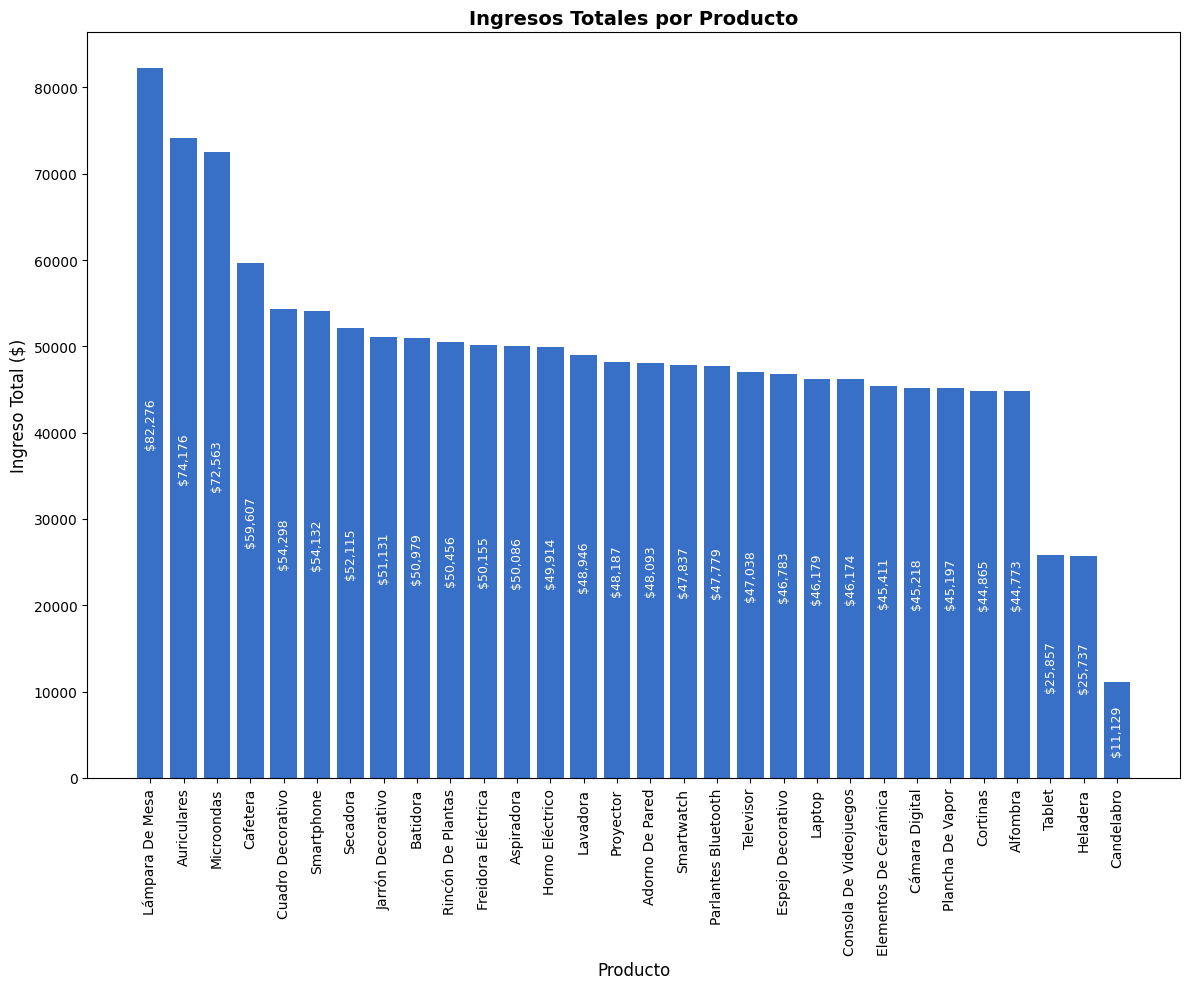

In [ ]:

df = resumen_prod.copy()

df_ordenado = df.sort_values("ingreso_total", ascending=False)

plt.figure(figsize=(12, 10))
color_celeste = "#386FC7"
barras = plt.bar(df_ordenado["producto"], df_ordenado["ingreso_total"], color=color_celeste)
plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")
plt.xlabel("Producto", fontsize=12)
plt.ylabel("Ingreso Total ($)", fontsize=12)
plt.xticks(rotation=90)

for barra in barras:
    y = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        y / 2,
        f"${y:,.0f}",
        ha='center',
        va='center',
        fontsize=9,
        color="white",
        rotation=90
    )

plt.tight_layout()
plt.show()

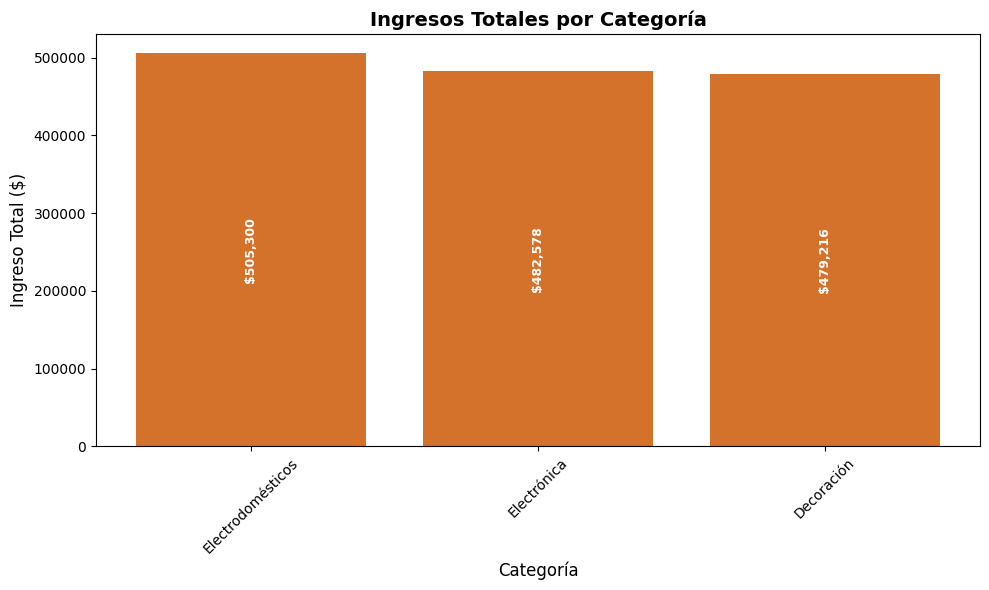

In [ ]:
df_cat = resumen_cat.copy()
df_ordenado = df_cat.sort_values("ingreso_total", ascending=False)

plt.figure(figsize=(10, 6))
color_naranja = "#D4722C"
barras = plt.bar(df_ordenado["categoria"], df_ordenado["ingreso_total"], color=color_naranja)
plt.title("Ingresos Totales por Categoría", fontsize=14, weight="bold")
plt.xlabel("Categoría", fontsize=12)
plt.ylabel("Ingreso Total ($)", fontsize=12)
plt.xticks(rotation=45)

for barra in barras:
    y = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        y / 2,
        f"${y:,.0f}",
        ha='center', va='center',
        fontsize=9, color="white", rotation=90, weight="bold"
    )

plt.tight_layout()
plt.show()

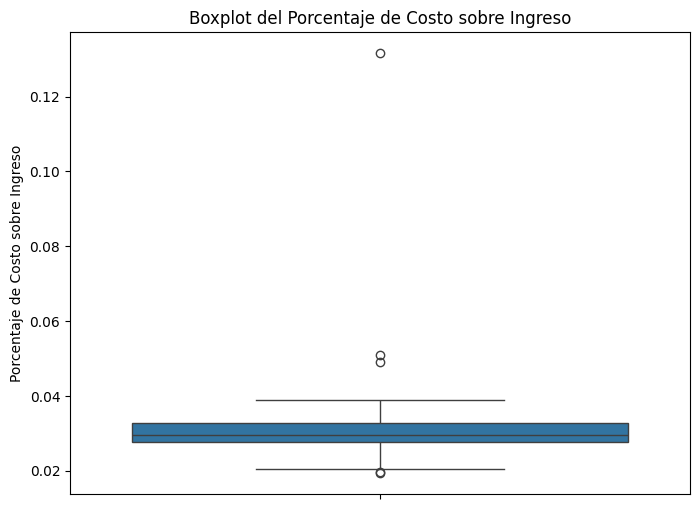

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_rendimiento_productos['porcentaje_costo_sobre_ingreso'])
plt.title('Boxplot del Porcentaje de Costo sobre Ingreso')
plt.ylabel('Porcentaje de Costo sobre Ingreso')
plt.show()

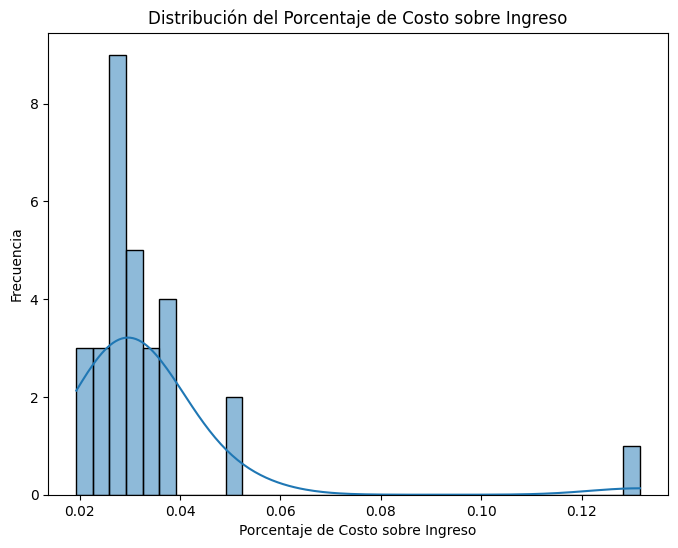

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df_rendimiento_productos['porcentaje_costo_sobre_ingreso'], kde=True)
plt.title('Distribución del Porcentaje de Costo sobre Ingreso')
plt.xlabel('Porcentaje de Costo sobre Ingreso')
plt.ylabel('Frecuencia')
plt.show()

## ETAPA 3: 1. Estadística Descriptiva: Calcular medidas de tendencia central y dispersión sobre las ventas. Presentar los resultados en un informe.

### Medidas de tendencia central

In [ ]:
media = df['ingreso_total'].mean()
mediana = df['ingreso_total'].median()
moda = df['ingreso_total'].mode()

print("Media:", media)
print("Mediana:", mediana)
print("Moda:")
print(moda)

Media: 489031.17333333334
Mediana: 482577.8
Moda:
0    479216.09
1     482577.8
2    505299.63
Name: ingreso_total, dtype: Float64


### Medidas de dispersión

In [ ]:
rango = df['ingreso_total'].max() - df['ingreso_total'].min()
varianza = df['ingreso_total'].var(ddof=1)
desviacion = df['ingreso_total'].std(ddof=1)

print("Rango:", rango)
print("Varianza:", varianza)
print("Desviación estándar:", desviacion)

Rango: 26083.53999999998
Varianza: 201322285.26743323
Desviación estándar: 14188.808451291223


### Rango intercuartílico (IQR)

In [ ]:
q1 = df['ingreso_total'].quantile(0.25)
q2 = df['ingreso_total'].quantile(0.5)
q3 = df['ingreso_total'].quantile(0.75)
iqr = q3 - q1

print("Q1:", q1)
print("Mediana (Q2):", q2)
print("Q3:", q3)
print("IQR:", iqr)


Q1: 45601.92
Mediana (Q2): 48140.244999999995
Q3: 51092.96
IQR: 5491.040000000001


### Detección de outliers usando el IQR
Regla general:

Límite inferior = Q1 − (1.5 × IQR)

Límite superior = Q3 + (1.5 × IQR)

In [ ]:
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

outliers = df[(df['ingreso_total'] < lim_inf) | (df['ingreso_total'] > lim_sup)]

print("Límite inferior:", lim_inf)
print("Límite superior:", lim_sup)
print("\nOutliers detectados:")
display(outliers)

Límite inferior: 37365.36
Límite superior: 59329.520000000004

Outliers detectados:


,producto,ingreso_total,unidades_vendidas,precio_promedio,registros
3,Auriculares,74175.58,958,76.30,143
5,Cafetera,59607.31,765,79.05,117
6,Candelabro,11128.8,160,74.60,24
14,Heladera,25736.8,330,74.13,48
19,Lámpara De Mesa,82276.38,1112,72.72,176
20,Microondas,72562.89,912,79.18,135
28,Tablet,25856.57,374,71.38,58


## ETAPA 3: 2. Análisis Exploratorio de Datos (EDA): Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.

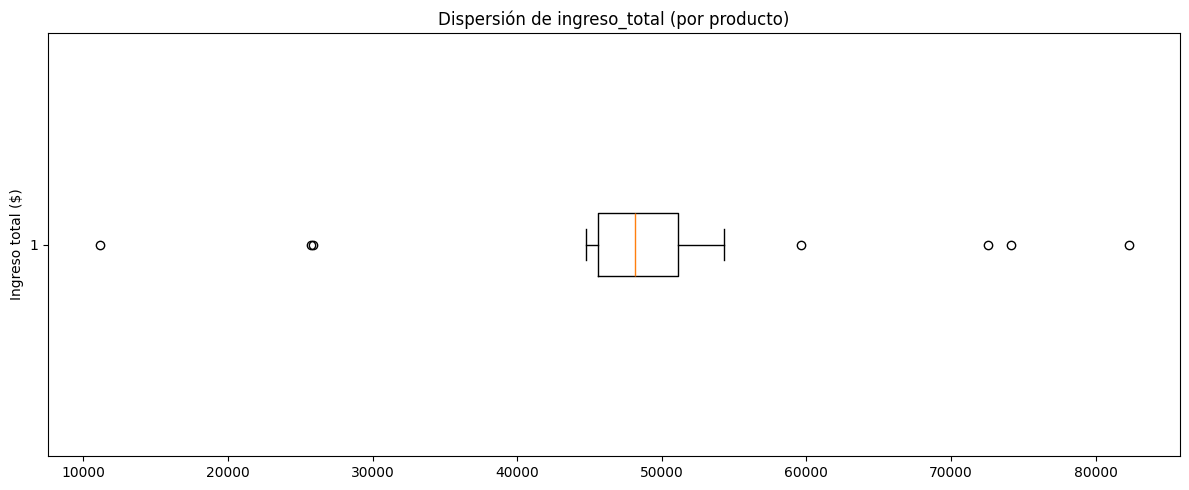

In [ ]:

vals = resumen_prod['ingreso_total'].dropna()

plt.figure(figsize=(12, 5))
plt.boxplot(vals, vert=False)
plt.title('Dispersión de ingreso_total (por producto)')
plt.ylabel('Ingreso total ($)')
plt.tight_layout()
plt.show()

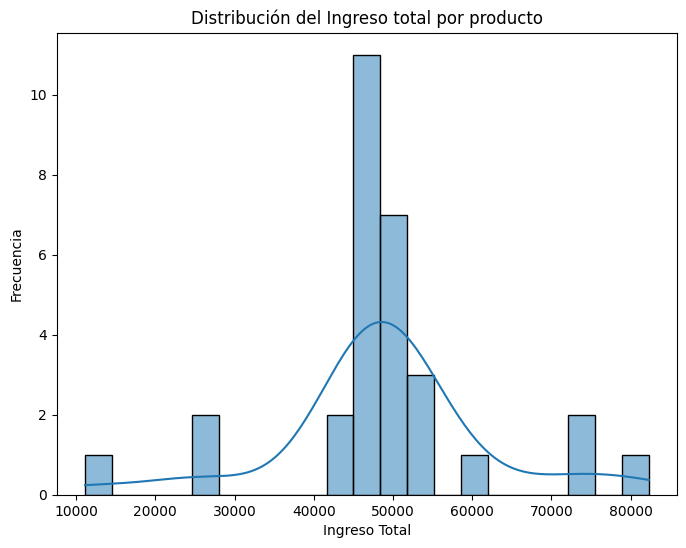

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(vals, kde=True)
plt.title('Distribución del Ingreso total por producto')
plt.xlabel('Ingreso Total')
plt.ylabel('Frecuencia')
plt.show()

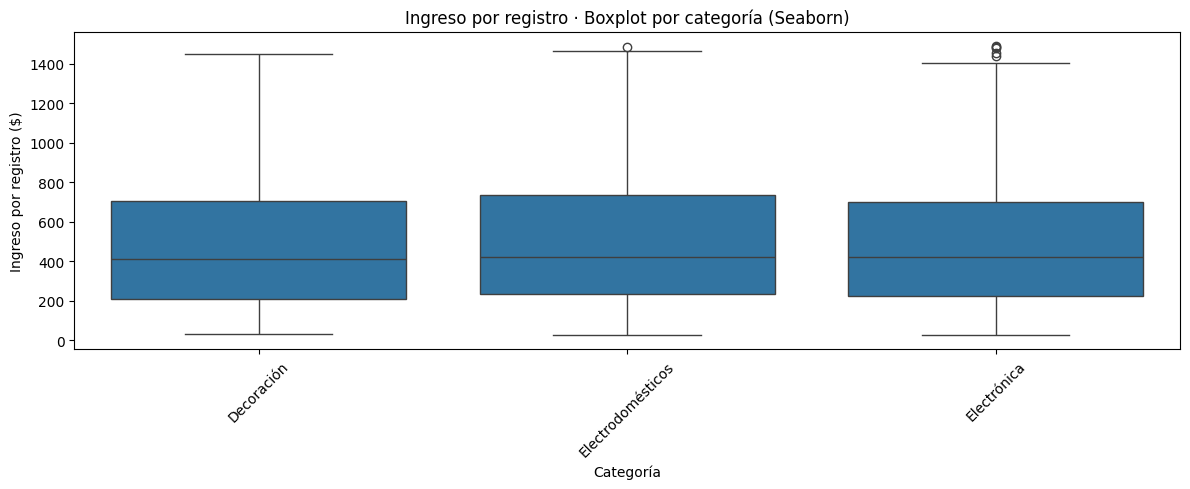

In [ ]:
# Boxplot por categoría (ingreso por registro)
plt.figure(figsize=(12, 5))
ax = sns.boxplot(data=ventas_cat, x='categoria', y='ingreso')
ax.set_title('Ingreso por registro · Boxplot por categoría ')
ax.set_xlabel('Categoría')
ax.set_ylabel('Ingreso por registro ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## ETAPA 3: 3 Correlación

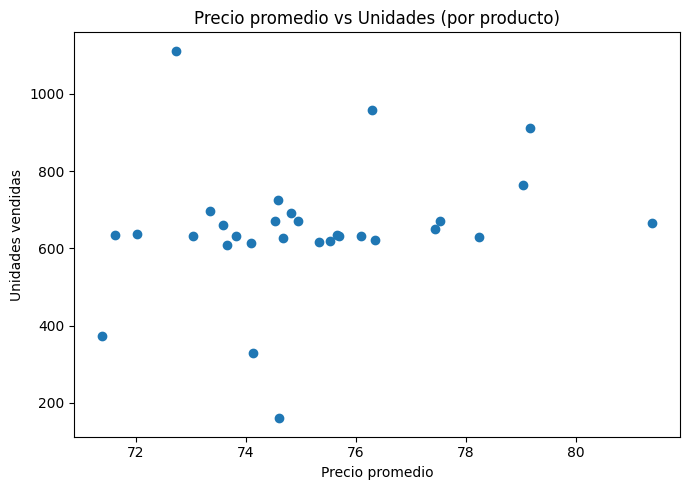

In [ ]:
x = resumen_prod['precio_promedio']
y = resumen_prod['unidades_vendidas']

plt.figure(figsize=(7, 5))
plt.scatter(x, y)
plt.title('Precio promedio vs Unidades (por producto)')
plt.xlabel('Precio promedio')
plt.ylabel('Unidades vendidas')
plt.tight_layout()
plt.show()

In [ ]:
# Calculamos el coeficiente de correlación de Pearson
corr_val = resumen_prod[['precio_promedio','unidades_vendidas']].corr().loc['precio_promedio','unidades_vendidas']

print(f"Coeficiente de correlación (Pearson): {corr_val:.3f}")
if corr_val > 0.8:
    print("Interpretación: relación positiva clara (a mayor precio_promedio, suelen venderse más unidades).")
elif corr_val > 0.2:
    print("Interpretación: relación positiva débil a moderada.")
elif corr_val < -0.8:
    print("Interpretación: relación negativa clara (a mayor precio_promedio, suelen venderse menos unidades).")
elif corr_val < -0.3:
    print("Interpretación: relación negativa débil a moderada.")
else:
    print("Interpretación: relación muy débil o nula.")

Coeficiente de correlación (Pearson): 0.217
Interpretación: relación positiva débil a moderada.


##📘 Presentación Final — Conclusiones Integrales del Proyecto

Este proyecto ha recorrido el ciclo completo de la Ciencia de Datos aplicado a un escenario de retail, demostrando cómo la modularización del código y el análisis estadístico transforman datos crudos en estrategias de negocio. A diferencia de un reporte tradicional, aquí las visualizaciones se integraron dinámicamente para validar cada hipótesis en tiempo real.

###🧾 ETAPA 1 y 2: Ingeniería, Calidad y Agregación de Datos

El punto de partida fue un conjunto de datos que requirió un preprocesamiento intensivo para asegurar la fiabilidad de los resultados.
- Limpieza Robusta: Implementamos funciones reutilizables (limpiar_precio, limpiar_cantidad) para normalizar formatos, garantizando que las decisiones financieras se basen en números reales.
- Ingeniería de Atributos: La creación del KPI ingreso_total fue fundamental para evaluar el rendimiento real.
- Validación Visual del Rendimiento: Al agrupar los datos, utilizamos gráficos de barras ordenados para confirmar visualmente el Principio de Pareto, evidenciando de inmediato qué categorías (como Decoración y Tecnología) sostienen la facturación, validando así la segmentación del "Top 20%".

###📊 ETAPA 3: Estadística Descriptiva, Outliers y EDA

En esta fase, profundizamos en la estructura de los datos, diferenciando el análisis por Producto (granular) y por Categoría (agregado) para evitar sesgos.
- Tendencia y Asimetría:La discrepancia entre la Media y la Mediana confirmó una distribución asimétrica positiva.El Histograma corroboró visualmente este sesgo, mostrando que la gran mayoría de productos tienen un rendimiento estándar, mientras una minoría excepcional empuja el promedio hacia arriba.
-Detección de Anomalías (Outliers):Mediante el Rango Intercuartílico (IQR) calculamos límites precisos para los productos.
- El Boxplot (Gráfico de Caja) fue la herramienta clave para confirmar estos hallazgos: los puntos fuera de la "caja" coincidieron perfectamente con los productos detectados por código (Lámpara de Mesa, Auriculares), demostrando que son casos de éxito comercial y no errores de carga.
- Correlación (Precio vs. Demanda):El coeficiente de correlación indicó una relación débil, pero fue el Gráfico de Dispersión (Scatter Plot) el que reveló la verdadera historia: las "burbujas" de mayor ingreso no se concentran solo en los precios bajos.Esto demostró visualmente que el precio alto no disuade la venta en productos de alto valor percibido.

### 🧠 Síntesis Conceptual

| Concepto Técnico | Aplicación en el Proyecto | Insight de Negocio |
| :--- | :--- | :--- |
| **Limpieza de Datos** | Funciones propias (`limpiar_numeros`) | Base sólida para decisiones financieras reales. |
| **Agregación + Visualización** | Ranking de Barras | Identificación instantánea de los líderes del mercado. |
| **Estadística (IQR)** | Cálculo de Outliers | Diferenciación entre anomalía matemática y éxito de ventas. |
| **EDA Visual** | Scatter Plot + Boxplot | Confirmación de que el mercado absorbe precios premium. |

###💡 Conclusiones y Recomendaciones Finales

- Potenciar a los "Outliers": Los productos identificados visual y estadísticamente fuera del rango superior son el motor del negocio. Se recomienda blindar su stock.
- Estrategia de Precios: La dispersión mostró que el volumen de ventas se sostiene incluso a precios medios-altos, sugiriendo que hay margen para defender márgenes sin sacrificar demanda.Gestión basada en Evidencia: La integración de gráficos junto a los cálculos permitió validar cada paso del proceso, reduciendo el riesgo de errores de interpretación y proporcionando una narrativa clara para la gerencia.

✅ Cierre:Hemos transformado datos crudos en un tablero de control estratégico. Al acompañar cada cálculo estadístico con su contraparte visual, logramos un análisis robusto y transparente, listo para fundamentar decisiones de negocio.